here mine imports

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/1991.csv')

In [10]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [8]:
df.shape

(5076925, 29)

**Q0.** Examine how many missing values there are in different columns of your dataset. Remove columns with totally missing values.

In [6]:
for column_name in df.columns:
    print(df[column_name].isnull().sum())

0
0
0
0
43505
0
56090
0
0
0
56090
0
56090
43505
0
0
26261
0
0


In [16]:
for column_name in df.columns:
    if df[column_name].isnull().sum() == df.shape[0]:
        print(column_name)

TailNum
AirTime
TaxiIn
TaxiOut
CancellationCode
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay


In [3]:
df = df.dropna('columns', how='all')

C:\Users\User\AppData\Local\Temp\ipykernel_16592\102169749.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns', how='all')


In [20]:
df.shape # now only 19/29 are left

(5076925, 19)

**Q1.** Visualize the correlation matrix of the numeric features of your dataset. Find top-10 of the most correlated pairs of columns. Can you explain why are they highly correlated?

In [21]:
df.corr()

C:\Users\User\AppData\Local\Temp\ipykernel_9896\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Distance,Cancelled,Diverted
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,NaN,1.000000,0.006707,-0.001769,-0.003813,-0.001934,-0.002384,-0.001838,0.016787,0.001087,0.002217,-0.028631,-0.029289,0.010559,-0.031704,-0.006695
DayofMonth,NaN,0.006707,1.000000,0.005891,-0.002353,-0.001550,-0.001718,-0.001005,0.001378,0.000853,0.001193,-0.005526,-0.005544,0.001125,-0.011076,-0.000952
DayOfWeek,NaN,-0.001769,0.005891,1.000000,0.005262,0.003906,0.006740,0.006716,0.007402,0.009725,0.014204,0.006240,0.020536,0.014389,-0.006978,0.000521
DepTime,NaN,-0.003813,-0.002353,0.005262,1.000000,0.984100,0.793693,0.821491,0.016760,-0.046212,-0.043425,0.108290,0.128147,-0.050281,NaN,0.002173
CRSDepTime,NaN,-0.001934,-0.001550,0.003906,0.984100,1.000000,0.785386,0.819418,0.018151,-0.050496,-0.046813,0.077316,0.095680,-0.053210,-0.003737,-0.001116
ArrTime,NaN,-0.002384,-0.001718,0.006740,0.793693,0.785386,1.000000,0.944741,0.011021,0.058332,0.056374,0.070468,0.071552,0.046770,NaN,NaN
CRSArrTime,NaN,-0.001838,-0.001005,0.006716,0.821491,0.819418,0.944741,1.000000,0.009707,0.059340,0.061840,0.081904,0.095566,0.052129,-0.007040,0.000519
FlightNum,NaN,0.016787,0.001378,0.007402,0.016760,0.018151,0.011021,0.009707,1.000000,-0.166403,-0.169189,-0.016325,-0.024913,-0.172730,0.000292,-0.005367
ActualElapsedTime,NaN,0.001087,0.000853,0.009725,-0.046212,-0.050496,0.058332,0.059340,-0.166403,1.000000,0.984070,0.107073,0.057504,0.973699,NaN,NaN


C:\Users\User\AppData\Local\Temp\ipykernel_9896\2438265331.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df.corr())


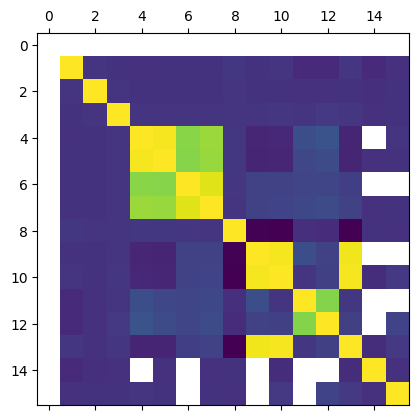

In [32]:
plt.matshow(df.corr())
plt.show()

First of all let's see the odds - Year has NaN correlation with all columns, this is cause the Year column has only one value (1991). So it is a constant, no correlation to the consant can be done. Furthermore, imagine training the model that only learns to say 1991.

The other nans have happened, due to the fact that columns are mutually exclusive. If your fly is cancelled, then when will you arrive? 
Technically the row with non cancelled have arrTime, also it seems Cancelled column too often takes 0 value

In [29]:
df['Cancelled'].sum()
df['Year']

43505

Below the code to get top 10 most correlated pairs in terms of abs values, without square brackets it returns all pairs so i had to avoid correlation on itself (first 15, if you look at the matrix you notice Year is excluded). Also i had to avoid identical pairs but swapped(just step 2)

In [55]:
df.corr().abs().unstack().sort_values(ascending=False)[15:35:2]

C:\Users\User\AppData\Local\Temp\ipykernel_9896\1098466335.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().abs().unstack().sort_values(ascending=False)[15:35:2]


CRSElapsedTime  Distance             0.985106
CRSDepTime      DepTime              0.984100
CRSElapsedTime  ActualElapsedTime    0.984070
Distance        ActualElapsedTime    0.973699
CRSArrTime      ArrTime              0.944741
DepTime         CRSArrTime           0.821491
CRSArrTime      CRSDepTime           0.819418
ArrTime         DepTime              0.793693
CRSDepTime      ArrTime              0.785386
DepDelay        ArrDelay             0.783604
dtype: float64

In [57]:
descriptions = pd.read_csv("./data/variable-descriptions.csv")
descriptions

,Variable descriptions,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,Name,Description
2,1.0,Year,1987-2008
3,2.0,Month,12-Jan
4,3.0,DayofMonth,31-Jan
5,4.0,DayOfWeek,1 (Monday) - 7 (Sunday)
6,5.0,DepTime,"actual departure time (local, hhmm)"
7,6.0,CRSDepTime,"scheduled departure time (local, hhmm)"
8,7.0,ArrTime,"actual arrival time (local, hhmm)"
9,8.0,CRSArrTime,"scheduled arrival time (local, hhmm)"


Now let's discuss why they have such correlation:
1. CRSElapsedTime  Distance  - scheduled epalsed time is highly correlated with the distance, as it is the easiest to measure value, assuming velocity is the same during the fly - distance will be the multiple of the time (D = U*t)
2. CRSDepTime      DepTime - scheduled dep Time is assumed to predict real DepTime, so having high correlation is expected. However, sometimes unexpected situations may happen.
3. CRSElapsedTime  ActualElapsedTime  
Scheduled elapsed time is also assumed to predict real elapsed time, so having high correlation is expected. However, sometimes unexpected situations may happen.
4. Distance        ActualElapsedTime 
Distance is higly correleted with scheduled Elapsedtime, which is highly correleted to Actual elapsedtime. Also at the same velocity achiving different distane is possible only with rising time at 2022.
5. CRSArrTime      ArrTime    
Scheduled arrival time is also assumed to predict real arrival time, so having high correlation is expected. However, sometimes unexpected situations may happen.
6. DepTime         CRSArrTime  
DepTime is highly correleted with CRSDepTime, that is very correleted with CRSArrTime (likely is a part of the formula of calculation of the expected arrival time).
7. CRSArrTime      CRSDepTime  
All scheduled(calculated) values in the airport are likely to be dependent (by being joined during calculation of other parameters)
ArrTime is likely to be a sum of Dep time, flying time and ending time,the same way for our expectations that would be scheduled
8. ArrTime         DepTime 
ArrTime includes DepTime, cuz there is no time travel and time is assumed to be linear with positive trend
9. CRSDepTime      ArrTime   
Dep Time is highly correleted with both ArrTime and Scheduled Dep time, since one first uses value of dep time to get its value and second is trying to predict Dep time
10. DepDelay        ArrDelay
Real Dep Time is highly correleted with DepDelay, i assume they use the formula RealDepTime = DepDelay + CRSDepTime
The same way i assume for ArrDelay, ArrTime = ArrDelay + CRSArrTime
As we know ArrTIme is dependent on DepTime

Conclusion:
The results based on top 10 highly correleted pairs, didn't provide us any reasonable information (that wouldn't be expected/obvious). 


**Q2.** Plot a graph of the number of cancelled flights by carrier (also provide human-readable carriers' names). Which company cancelled races most often?

<AxesSubplot: xlabel='UniqueCarrier'>

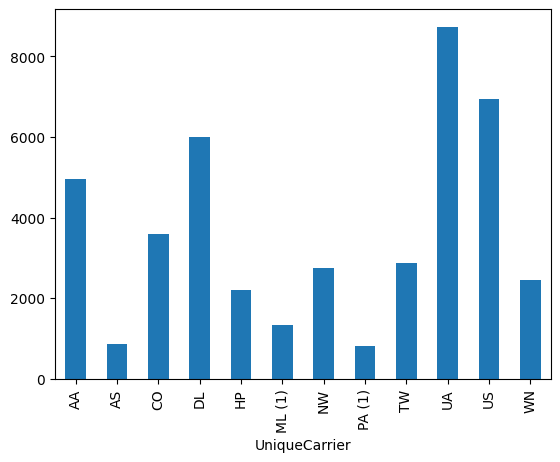

In [10]:
carrier_counts = df.groupby('UniqueCarrier')['Cancelled'].sum()
carrier_counts.plot(kind='bar', x='UniqueCarrier', y='Cancelled')

<AxesSubplot: xlabel='UniqueCarrier'>

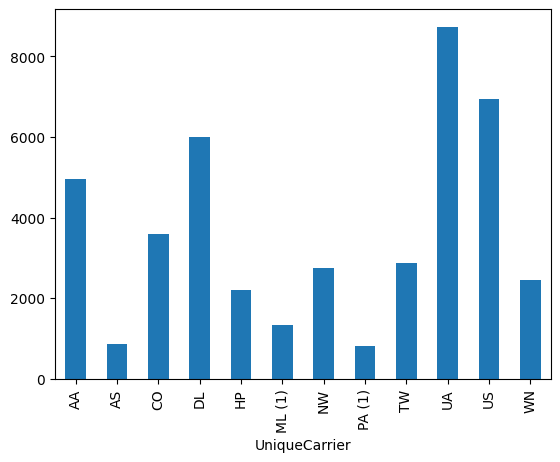

In [11]:
carrier_counts = df.groupby('UniqueCarrier')['Cancelled'].sum()
carrier_counts.plot(kind='bar', x='UniqueCarrier')

In [18]:
df['Cancelled'].value_counts()

0    5033420
1      43505
Name: Cancelled, dtype: int64

In [19]:
df['UniqueCarrier'].value_counts()

US        907184
DL        874791
AA        725191
UA        630093
NW        460230
CO        424734
WN        368734
TW        231769
HP        219896
AS         98952
ML (1)     70622
PA (1)     64729
Name: UniqueCarrier, dtype: int64

In [20]:
carrier_counts

UniqueCarrier
AA        4951
AS         858
CO        3600
DL        5990
HP        2204
ML (1)    1342
NW        2741
PA (1)     825
TW        2871
UA        8732
US        6932
WN        2459
Name: Cancelled, dtype: int64

<AxesSubplot: >

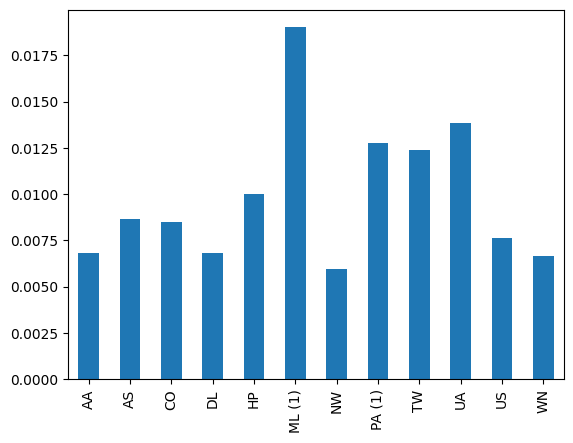

In [21]:
carrier_counts = df.groupby('UniqueCarrier')['Cancelled'].sum().divide(df['UniqueCarrier'].value_counts())
carrier_counts.plot(kind='bar', x='UniqueCarrier')

So in total we have 43505 cancelled flights.
As you can see from the graph UA and US have highest amounts of cancelled flights (above 6000). 
However, we must account proportions to make reasonable conclusions.
About UA <United Airlines Inc.>:
8732 cancelled flights out of 630093 
UA cancelled proportion = 8732/630093 = 0.01385827171
About US <US Airways Inc.>:
6932 cancelled flights out of 907184
US cancelled propotion = 6932/907184 = 0.00764122824
Low values - the chance of cancelled flight given you use UA or US carriers is ~ 1%.

Beforehand i was using counts of cancelled flights, but proportion makes more sence.
From the graph of the proportions of cancelled flights among carriers we see that in general cancelled flight propability is about 1 %.
However, the highest risk of cancellation is in ML(1) with the proportion ~ 0.018, so it is close to 2 %.

So if i got to answer for a question: which UniqueCarriers cancelled is more often (in terms of counts) - than my answer will be UA <United Airlines Inc.> and US <US Airways Inc.>. But if i answer in terms of the frequency - my answer will be ML(1) <Midway Airlines Inc. (1)>.

Now let's draw graph with readable names


In [22]:
name_parser = pd.read_csv('./data/carriers.csv')


In [23]:
df = df.merge(name_parser, left_on='UniqueCarrier', right_on='Code')

In [24]:
df = df.drop('Code', axis=1)


In [25]:
df = df.rename(columns={'Description':'UniqueCarrierDescription'})

In [27]:
df['UniqueCarrierDescription'] = df['UniqueCarrierDescription'].apply(lambda row: " ".join(row.split()[:2]))

<AxesSubplot: >

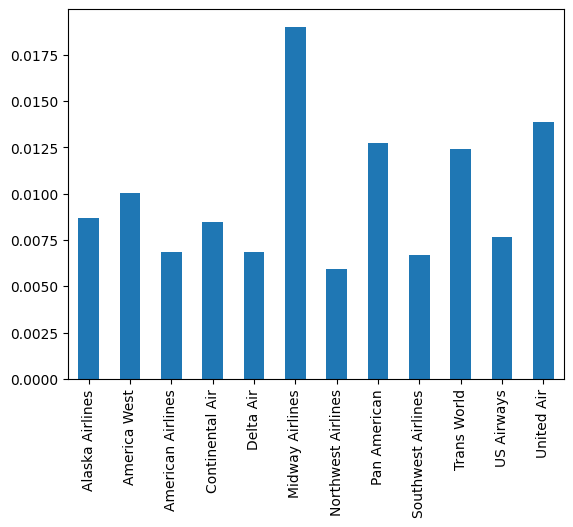

In [28]:
carrier_counts = df.groupby('UniqueCarrierDescription')['Cancelled'].sum().divide(df['UniqueCarrierDescription'].value_counts())
carrier_counts.plot(kind='bar', x='UniqueCarrierDescription')

<END of the answer 2>

**Q3.** Select all flights of the most popular carrier scheduled on 1st day of a month. Print top-10 of such flights with greatest arrival delays.

In [ ]:
df_q3 = df[df['DayofMonth'] == 1]

In [46]:
carrier_counts = df_q3.groupby('UniqueCarrier').size()

most_popular_carrier = carrier_counts.nlargest(1)

most_popular_flights = df_q3[df_q3['UniqueCarrier'] == most_popular_carrier.index[0]]

top_delayed_flights = most_popular_flights.sort_values('ArrDelay', ascending=False).head(10)

print(top_delayed_flights)

        Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
775828  1991     11           1          5   1712.0        1105   1830.0   
844508  1991     12           1          7   1859.0        1340   2101.0   
902558  1991     12           1          7   2121.0        1530   2300.0   
148816  1991      2           1          5     16.0        1955    249.0   
795996  1991     11           1          5   2157.0        1745   2308.0   
793524  1991     11           1          5   2338.0        1940    215.0   
812870  1991     11           1          5   2220.0        1910    117.0   
778759  1991     11           1          5   1951.0        1755   2151.0   
805562  1991     11           1          5   1702.0        1400   1822.0   
129979  1991      2           1          5   2134.0        1900   2327.0   

        CRSArrTime UniqueCarrier  FlightNum  ActualElapsedTime  \
775828        1212            US        339              138.0   
844508        1446            U

<END of the 3 answer>

**Q4.** Create column `DepDatetime` with datetimes of departures in the format `yyyy-mm-dd HH:MM`.

the problem is that values initially were string, but as all like numbers it converted to INTS and if nans were present - it converted to FLOATS


In [19]:
def get_departures_format(row):
    if row['Cancelled'] == 0:
        month =  str(row['DayofMonth'])
        if len(month) < 2:
            month = '0' + month
        day = str(row['DayofMonth'])
        if len(day) < 2:
            day = '0' + day
        time = str(int(row['DepTime']))
        if len(time) < 4:  # my data had Deptime as HHMM but column type was float, so i got to add 0
            time = '0' + time
        if float(time) == 2400 or float(time) == 0:
            time = '0000'

        return f"{row['Year']}-{month}-{day} {time[0:2]}:{time[2:4]}"
    else:
        return pd.NA

In [20]:
df['DepDatetime'] = df.apply(get_departures_format, axis=1, )

In [21]:
df.head(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,Diverted,DepDatetime
0,1991,1,1,2,1709.0,1705,1944.0,1944,US,112,155.0,159,0.0,4.0,TPA,SYR,1104.0,0,0,1991-01-01 17:09
1,1991,1,2,3,1704.0,1705,1946.0,1944,US,112,162.0,159,2.0,-1.0,TPA,SYR,1104.0,0,0,1991-02-02 17:04
2,1991,1,3,4,1705.0,1705,1934.0,1944,US,112,149.0,159,-10.0,0.0,TPA,SYR,1104.0,0,0,1991-03-03 17:05
3,1991,1,4,5,1709.0,1705,1951.0,1944,US,112,162.0,159,7.0,4.0,TPA,SYR,1104.0,0,0,1991-04-04 17:09
4,1991,1,5,6,1703.0,1705,1936.0,1944,US,112,153.0,159,-8.0,-2.0,TPA,SYR,1104.0,0,0,1991-05-05 17:03
5,1991,1,6,7,1711.0,1705,1949.0,1944,US,112,158.0,159,5.0,6.0,TPA,SYR,1104.0,0,0,1991-06-06 17:11
6,1991,1,7,1,1711.0,1705,1946.0,1944,US,112,155.0,159,2.0,6.0,TPA,SYR,1104.0,0,0,1991-07-07 17:11
7,1991,1,8,2,1704.0,1705,1934.0,1944,US,112,150.0,159,-10.0,-1.0,TPA,SYR,1104.0,0,0,1991-08-08 17:04
8,1991,1,9,3,1805.0,1705,2042.0,1944,US,112,157.0,159,58.0,60.0,TPA,SYR,1104.0,0,0,1991-09-09 18:05
9,1991,1,10,4,1703.0,1705,1946.0,1944,US,112,163.0,159,2.0,-2.0,TPA,SYR,1104.0,0,0,1991-10-10 17:03


<END of the 4 answer>

**Q5.** Plot the histograms of arrival and departure delays. Adjust figure size, number of bins and type of scales.

<AxesSubplot: title={'center': 'Hist of ArrDelay'}, ylabel='Frequency'>

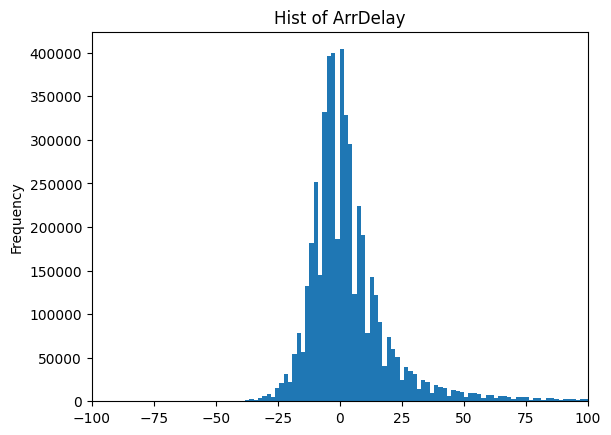

In [83]:
df['ArrDelay'].plot(kind='hist', bins=1500, alpha=1, title='Hist of ArrDelay', xlim=[-100, 100], density=False)

density false -> absolute frequencies 
this is a frequency of ArrTime for 5mln ~ rows 

<AxesSubplot: title={'center': 'Hist of ArrDelay'}, ylabel='Frequency'>

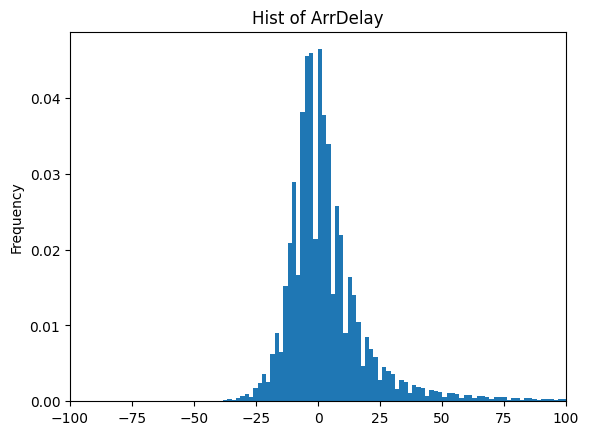

In [91]:
df['ArrDelay'].plot(kind='hist', bins=1500, alpha=1, title='Hist of ArrDelay', xlim=[-100, 100], density=True)

In [88]:
df.shape

(5076925, 21)

Departure Delays

<AxesSubplot: title={'center': 'Hist of ArrDelay'}, ylabel='Frequency'>

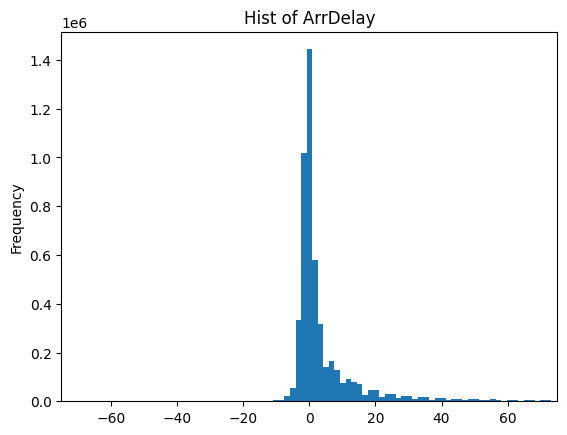

In [6]:
df['DepDelay'].plot(kind='hist', bins=1500, alpha=1, title='Hist of ArrDelay', xlim=[-75, 75], density=False)

<AxesSubplot: title={'center': 'Hist of ArrDelay'}, ylabel='Frequency'>

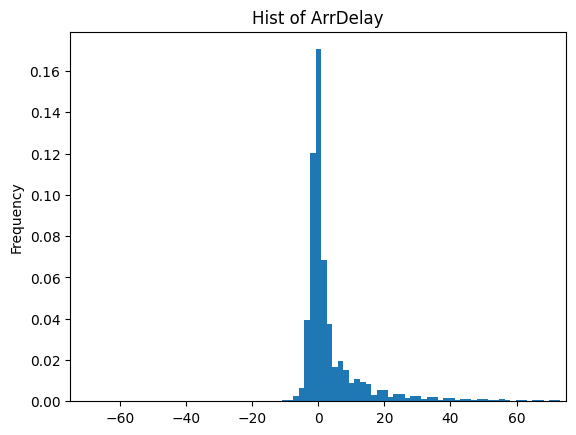

In [7]:
df['DepDelay'].plot(kind='hist', bins=1500, alpha=1, title='Hist of ArrDelay', xlim=[-75, 75], density=True)

<END of the 5th answer>

**Q6.** Plot boxplots of arrival delays, grouped by 
* month
* day of week
* hour
* carrier

Answer question 1 from the coursework project file.

Month

1          AxesSubplot(0.1,0.15;0.056338x0.75)
2     AxesSubplot(0.167606,0.15;0.056338x0.75)
3     AxesSubplot(0.235211,0.15;0.056338x0.75)
4     AxesSubplot(0.302817,0.15;0.056338x0.75)
5     AxesSubplot(0.370423,0.15;0.056338x0.75)
6     AxesSubplot(0.438028,0.15;0.056338x0.75)
7     AxesSubplot(0.505634,0.15;0.056338x0.75)
8     AxesSubplot(0.573239,0.15;0.056338x0.75)
9     AxesSubplot(0.640845,0.15;0.056338x0.75)
10    AxesSubplot(0.708451,0.15;0.056338x0.75)
11    AxesSubplot(0.776056,0.15;0.056338x0.75)
12    AxesSubplot(0.843662,0.15;0.056338x0.75)
dtype: object

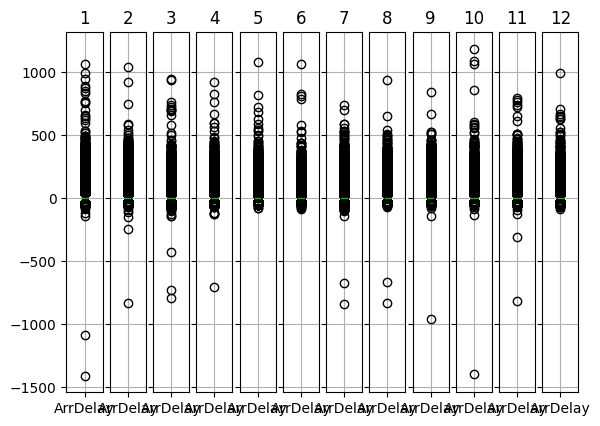

In [32]:
df.groupby(by='Month').boxplot(True, column='ArrDelay',layout=(1, 12))

In [21]:
df.groupby(by='Month')['ArrDelay'].describe()

,count,mean,std,min,25%,50%,75%,max
Month,,,,,,,,
1,416206.0,9.245960,27.962269,-1410.0,-5.0,3.0,14.0,1063.0
2,379661.0,4.319880,23.361086,-830.0,-7.0,0.0,9.0,1046.0
3,424281.0,5.234036,23.153931,-794.0,-6.0,1.0,10.0,946.0
4,418299.0,4.252473,22.495516,-702.0,-6.0,0.0,9.0,925.0
5,426500.0,4.518790,23.299756,-77.0,-6.0,0.0,8.0,1082.0
6,421876.0,3.525925,19.769558,-85.0,-6.0,0.0,8.0,1063.0
7,437977.0,4.439263,22.523685,-838.0,-6.0,0.0,8.0,744.0
8,438558.0,4.622741,20.759990,-835.0,-6.0,0.0,9.0,938.0
9,415003.0,1.889471,18.236771,-960.0,-7.0,-1.0,6.0,845.0


Assuming outliers are independent from month, here we see that in general the ditribution is larger. However, shall be mentioned - from the graph it seems 1 month had the highest variation of ArrDelays

Day of week

1         AxesSubplot(0.1,0.15;0.097561x0.75)
2    AxesSubplot(0.217073,0.15;0.097561x0.75)
3    AxesSubplot(0.334146,0.15;0.097561x0.75)
4     AxesSubplot(0.45122,0.15;0.097561x0.75)
5    AxesSubplot(0.568293,0.15;0.097561x0.75)
6    AxesSubplot(0.685366,0.15;0.097561x0.75)
7    AxesSubplot(0.802439,0.15;0.097561x0.75)
dtype: object

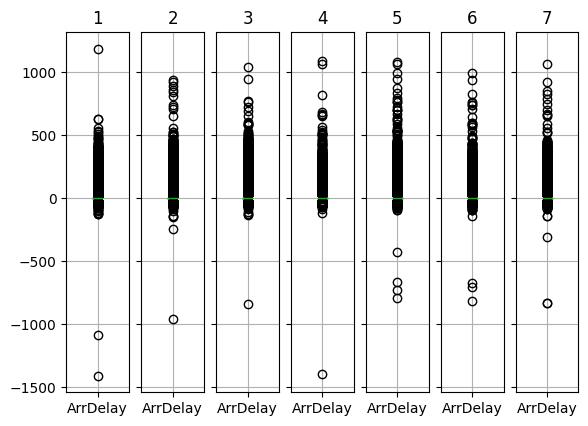

In [33]:
df.groupby(by='DayOfWeek').boxplot(True, column='ArrDelay', layout=(1, 7))

In [25]:
df.groupby(by='DayOfWeek')['ArrDelay'].describe()

,count,mean,std,min,25%,50%,75%,max
DayOfWeek,,,,,,,,
1,739793.0,3.391235,20.241400,-1410.0,-6.0,0.0,8.0,1188.0
2,749400.0,4.168541,22.125701,-960.0,-6.0,0.0,8.0,938.0
3,736524.0,5.377385,22.525047,-838.0,-6.0,1.0,10.0,1046.0
4,731571.0,6.018254,22.549292,-1395.0,-5.0,1.0,10.0,1088.0
5,729834.0,6.789780,25.479435,-794.0,-5.0,1.0,11.0,1082.0
6,645638.0,3.186903,21.622173,-818.0,-7.0,-1.0,8.0,997.0
7,688075.0,4.028397,22.123027,-835.0,-7.0,0.0,9.0,1063.0


First day of the week seems to have the lowest variation of ArrDelays

HOUR (in the dataset we don't have specifically column Hour).
We could use any Time variable, but it seems more reasonable to use scheduled departure time (CRSDepTime). Intuition: we would like to see if controllable variable (by decision makers) have any effect on arrival delays.

0          AxesSubplot(0.1,0.15;0.0268456x0.75)
1     AxesSubplot(0.132215,0.15;0.0268456x0.75)
2      AxesSubplot(0.16443,0.15;0.0268456x0.75)
3     AxesSubplot(0.196644,0.15;0.0268456x0.75)
4     AxesSubplot(0.228859,0.15;0.0268456x0.75)
5     AxesSubplot(0.261074,0.15;0.0268456x0.75)
6     AxesSubplot(0.293289,0.15;0.0268456x0.75)
7     AxesSubplot(0.325503,0.15;0.0268456x0.75)
8     AxesSubplot(0.357718,0.15;0.0268456x0.75)
9     AxesSubplot(0.389933,0.15;0.0268456x0.75)
10    AxesSubplot(0.422148,0.15;0.0268456x0.75)
11    AxesSubplot(0.454362,0.15;0.0268456x0.75)
12    AxesSubplot(0.486577,0.15;0.0268456x0.75)
13    AxesSubplot(0.518792,0.15;0.0268456x0.75)
14    AxesSubplot(0.551007,0.15;0.0268456x0.75)
15    AxesSubplot(0.583221,0.15;0.0268456x0.75)
16    AxesSubplot(0.615436,0.15;0.0268456x0.75)
17    AxesSubplot(0.647651,0.15;0.0268456x0.75)
18    AxesSubplot(0.679866,0.15;0.0268456x0.75)
19    AxesSubplot(0.712081,0.15;0.0268456x0.75)
20    AxesSubplot(0.744295,0.15;0.026845

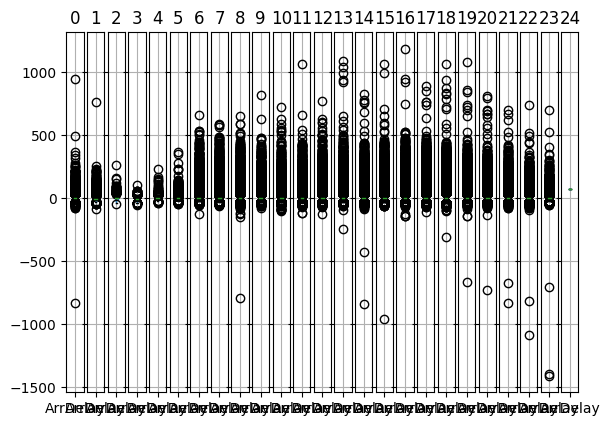

In [35]:
df.groupby(by=df['CRSDepTime'] // 100).boxplot(True, column='ArrDelay', layout=(1, 25))

In [31]:
df[df['CRSDepTime'] >= 2400]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,Diverted
5002031,1991,12,24,2,106.0,2400,145.0,34,AA,765,39.0,34,71.0,66.0,SMF,OAK,75.0,0,0


Okey we expected to see hours from 0 to 23, but we see from 0 to 24, but if we look at the data on DepTime itself, we notice that the only vaue possible with 24 is 00:00 ~ 24:00
So the first minute from [0:59].
For a while let's make 2400 to 0000 or just 0 (since it is float)


In [37]:
df_cleared = df
df_cleared[df_cleared['CRSDepTime'] >= 2400] = 0

0          AxesSubplot(0.1,0.15;0.027972x0.75)
1     AxesSubplot(0.133566,0.15;0.027972x0.75)
2     AxesSubplot(0.167133,0.15;0.027972x0.75)
3     AxesSubplot(0.200699,0.15;0.027972x0.75)
4     AxesSubplot(0.234266,0.15;0.027972x0.75)
5     AxesSubplot(0.267832,0.15;0.027972x0.75)
6     AxesSubplot(0.301399,0.15;0.027972x0.75)
7     AxesSubplot(0.334965,0.15;0.027972x0.75)
8     AxesSubplot(0.368531,0.15;0.027972x0.75)
9     AxesSubplot(0.402098,0.15;0.027972x0.75)
10    AxesSubplot(0.435664,0.15;0.027972x0.75)
11    AxesSubplot(0.469231,0.15;0.027972x0.75)
12    AxesSubplot(0.502797,0.15;0.027972x0.75)
13    AxesSubplot(0.536364,0.15;0.027972x0.75)
14     AxesSubplot(0.56993,0.15;0.027972x0.75)
15    AxesSubplot(0.603497,0.15;0.027972x0.75)
16    AxesSubplot(0.637063,0.15;0.027972x0.75)
17    AxesSubplot(0.670629,0.15;0.027972x0.75)
18    AxesSubplot(0.704196,0.15;0.027972x0.75)
19    AxesSubplot(0.737762,0.15;0.027972x0.75)
20    AxesSubplot(0.771329,0.15;0.027972x0.75)
21    AxesSub

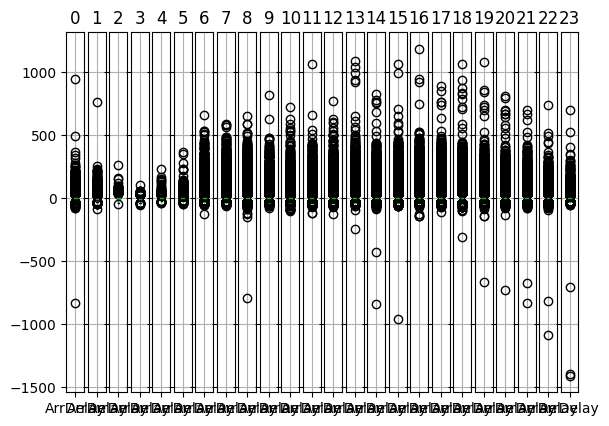

In [38]:
df.groupby(by=df['CRSDepTime'] // 100).boxplot(True, column='ArrDelay', layout=(1, 24))

In [40]:
df.groupby(by=df['CRSDepTime'] // 100).describe()

Year                                                          \
               count         mean        std     min     25%     50%     75%   
CRSDepTime                                                                     
0            17137.0  1990.883819  15.209112     0.0  1991.0  1991.0  1991.0   
1            15073.0  1991.000000   0.000000  1991.0  1991.0  1991.0  1991.0   
2             1831.0  1991.000000   0.000000  1991.0  1991.0  1991.0  1991.0   
3              729.0  1991.000000   0.000000  1991.0  1991.0  1991.0  1991.0   
4             1668.0  1991.000000   0.000000  1991.0  1991.0  1991.0  1991.0   
5            12416.0  1991.000000   0.000000  1991.0  1991.0  1991.0  1991.0   
6           254101.0  1991.000000   0.000000  1991.0  1991.0  1991.0  1991.0   
7           382858.0  1991.000000   0.000000  1991.0  1991.0  1991.0  1991.0   
8           397540.0  1991.000000   0.000000  1991.0  1991.0  1991.0  1991.0   
9           330482.0  1991.000000   0.000000  1991.0  1991.0  1991.0  1991.0   
10          287320.0  1991.000000   0.000000  1991.0  1991.0  1991.0  1991.0   
11          306494.0  1991.000000   0.000000  1991.0  1991.0  1991.0  1991.0   
12          336208.0  1991.000000   0.000000  1991.0  1991.0  1991.0  1991.0   
13          345980.0  1991.000000   0.000000  1991.0  1991.0  1991.0  1991.0   
14          289590.0  1991.000000   0.000000  1991.0  1991.0  1991.0  1991.0   
15          308144.0  1991.000000   0.000000  1991.0  1991.0  1991.0  1991.0   
16          322961.0  1991.000000   0.000000  1991.0  1991.0  1991.0  1991.0   
17          335831.0  1991.000000   0.000000  1991.0  1991.0  1991.0  1991.0   
18          341370.0  1991.000000   0.000000  1991.0  1991.0  1991.0  1991.0   
19          282321.0  1991.000000   0.000000  1991.0  1991.0  1991.0  1991.0   
20          252465.0  1991.000000   0.000000  1991.0  1991.0  1991.0  1991.0   
21          152863.0  1991.000000   0.000000  1991.0  1991.0  1991.0  1991.0   
22           62895.0  1991.000000   0.000000  1991.0  1991.0  1991.0  1991.0   
23           38648.0  1991.000000   0.000000  1991.0  1991.0  1991.0  1991.0   

                       Month            ... Cancelled       Diverted  \
               max     count      mean  ...       75%  max     count   
CRSDepTime                              ...                            
0           1991.0   17137.0  6.462975  ...       0.0  1.0   17137.0   
1           1991.0   15073.0  6.536124  ...       0.0  1.0   15073.0   
2           1991.0    1831.0  6.337520  ...       0.0  1.0    1831.0   
3           1991.0     729.0  6.620027  ...       0.0  1.0     729.0   
4           1991.0    1668.0  5.705635  ...       0.0  1.0    1668.0   
5           1991.0   12416.0  6.510551  ...       0.0  1.0   12416.0   
6           1991.0  254101.0  6.461376  ...       0.0  1.0  254101.0   
7           1991.0  382858.0  6.562154  ...       0.0  1.0  382858.0   
8           1991.0  397540.0  6.526000  ...       0.0  1.0  397540.0   
9           1991.0  330482.0  6.531403  ...       0.0  1.0  330482.0   
10          1991.0  287320.0  6.465954  ...       0.0  1.0  287320.0   
11          1991.0  306494.0  6.554278  ...       0.0  1.0  306494.0   
12          1991.0  336208.0  6.498599  ...       0.0  1.0  336208.0   
13          1991.0  345980.0  6.516799  ...       0.0  1.0  345980.0   
14          1991.0  289590.0  6.527163  ...       0.0  1.0  289590.0   
15          1991.0  308144.0  6.473347  ...       0.0  1.0  308144.0   
16          1991.0  322961.0  6.527887  ...       0.0  1.0  322961.0   
17          1991.0  335831.0  6.515661  ...       0.0  1.0  335831.0   
18          1991.0  341370.0  6.526903  ...       0.0  1.0  341370.0   
19          1991.0  282321.0  6.479174  ...       0.0  1.0  282321.0   
20          1991.0  252465.0  6.531084  ...       0.0  1.0  252465.0   
21          1991.0  152863.0  6.479743  ...       0.0  1.0  152863.0   
22          1991.0   62895.0  6.286605  ...       0.0  

I would fly at periods with lowest variation since it is less random. Around 3 AM is the best time. In general, even tho means could be different, i'd prefer value with as lower as possible variance (with given high amouns of rows) - because of consistency of delays

remark: I was planning to use copy of df, but i just refactored it and didn't notice, therefore df is updated


CARRIER

0              AxesSubplot(0.1,0.15;0.0519481x0.75)
AA        AxesSubplot(0.162338,0.15;0.0519481x0.75)
AS        AxesSubplot(0.224675,0.15;0.0519481x0.75)
CO        AxesSubplot(0.287013,0.15;0.0519481x0.75)
DL        AxesSubplot(0.349351,0.15;0.0519481x0.75)
HP        AxesSubplot(0.411688,0.15;0.0519481x0.75)
ML (1)    AxesSubplot(0.474026,0.15;0.0519481x0.75)
NW        AxesSubplot(0.536364,0.15;0.0519481x0.75)
PA (1)    AxesSubplot(0.598701,0.15;0.0519481x0.75)
TW        AxesSubplot(0.661039,0.15;0.0519481x0.75)
UA        AxesSubplot(0.723377,0.15;0.0519481x0.75)
US        AxesSubplot(0.785714,0.15;0.0519481x0.75)
WN        AxesSubplot(0.848052,0.15;0.0519481x0.75)
dtype: object

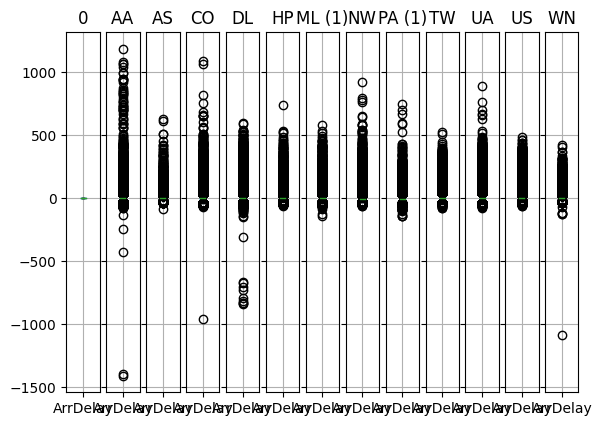

In [39]:
df.groupby(by='UniqueCarrier').boxplot(True, column='ArrDelay', layout=(1, 13))

In [37]:
df.groupby(by='UniqueCarrier')['ArrDelay'].describe()

,count,mean,std,min,25%,50%,75%,max
UniqueCarrier,,,,,,,,
0,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
AA,718043.0,3.870342,24.159146,-1410.0,-8.0,-1.0,8.0,1188.0
AS,97577.0,4.297898,18.689077,-86.0,-5.0,0.0,8.0,630.0
CO,419702.0,4.544000,25.131757,-960.0,-8.0,0.0,10.0,1088.0
DL,867414.0,6.724782,21.827121,-838.0,-4.0,2.0,11.0,600.0
HP,217218.0,4.934844,20.675005,-58.0,-4.0,1.0,8.0,738.0
ML (1),69119.0,4.747609,26.976582,-144.0,-7.0,0.0,8.0,584.0
NW,456370.0,1.728451,22.360334,-59.0,-9.0,-2.0,6.0,926.0
PA (1),63647.0,0.721841,25.594844,-143.0,-12.0,-4.0,7.0,749.0


AA, CO, NW showed higher variation

**Q7.** Add column with ages of planes. Do older planes suffer more delays? Plot some graphs justifying your answer.

In [38]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'ArrDelay', 'DepDelay', 'Origin',
       'Dest', 'Distance', 'Cancelled', 'Diverted'],
      dtype='object')

The only way to solve this question is to use foreign keys (TailNum) from wich i could merge needed data from plane-data.csv and draw graph to see the differences.
I'm lucky fellow tho i don't have this data (initially column has only Nans)

Therefore this is the end of my answers. Now i'll refactor them to make more structured sequence